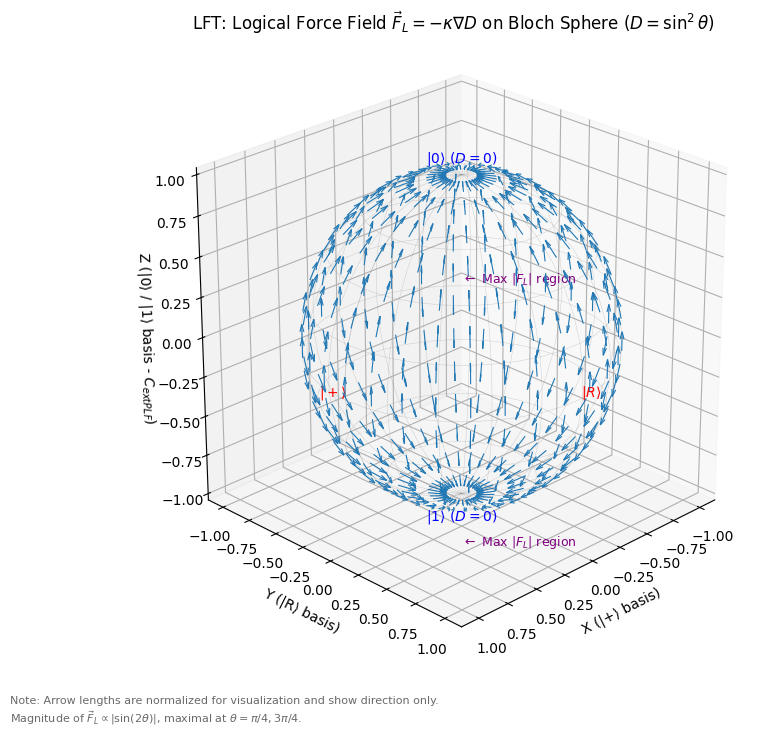

PNG saved to working directory as lft_bloch_force_field_revised.png

--- Caption for Bloch Force Field Plot (Fig. 1 in simulation sequence) ---

Visualization of the normalized Logical Force field $\vec{F}_L = -\kappa \nabla D$ on the surface of the Bloch sphere 
for a single qubit, according to Logic Field Theory (LFT). For a single qubit within the Z-aligned 
Preferred Logical Frame ($C_{\text{PLF}}$), the Logical Strain is $D(\theta) = \sin^2\theta$, where $\theta$ is the 
polar angle from the $+Z$ axis ($|0\rangle$ state). This strain $D$ is 0 at the poles ($|0\rangle, |1\rangle$) 
and maximal ($D=1$) at the equator (e.g., states $|+\rangle, |R\rangle \equiv |Y^+\rangle$). 
The arrows indicate the direction of $\vec{F}_L$, which drives states towards regions of lower strain 
(i.e., towards the poles $|0\rangle$ or $|1\rangle$). Arrow lengths in this plot are normalized for visual 
clarity and do not represent the force magnitude, which is proportional to $|\sin(2\theta)|$ and is 
m

In [ ]:
# ---------------- Bloch-Sphere Logical-Strain Vector Field (Revised) ----------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 (needed for 3-D)

# ----- 1. LFT Model Parameters & Assumptions ------------------------------------
# kappa_visualization_scale: Scales the conceptual force for visualization.
# Actual force magnitude is |κ sin(2θ)|. Arrow lengths here are normalized.
kappa_visualization_scale = 1.0

n_theta = 15           # Number of polar-angle samples (increase for finer grid)
n_phi   = 30           # Number of azimuthal-angle samples

# LFT Assumption for Single Qubit Strain in Z-aligned C_PLF:
# D(|ψ⟩) = 1 - min(L_I, L_N, L_E)
# For a single qubit, L_N=1, L_E=1.
# L_I = ⟨Z⟩² = cos²(θ) (where θ is polar angle from +Z).
# Thus, D = 1 - min(cos²(θ), 1, 1) = 1 - cos²(θ) = sin²(θ).
# This D is 0 at poles (|0⟩, |1⟩) and 1 at the equator (e.g., |+⟩, |Y+⟩).

# ----- 2. Grid on the Sphere -----------------------------------------------------
# Avoid exact poles for quiver plot clarity if arrows originate from poles.
theta = np.linspace(0.05 * np.pi, 0.95 * np.pi, n_theta) # Slightly away from poles
phi   = np.linspace(0, 2 * np.pi, n_phi, endpoint=False) # endpoint=False for better spacing
theta_grid, phi_grid = np.meshgrid(theta, phi)

# Cartesian coordinates of each grid point (radius = 1)
x_points = np.sin(theta_grid) * np.cos(phi_grid)
y_points = np.sin(theta_grid) * np.sin(phi_grid)
z_points = np.cos(theta_grid)

# ----- 3. Logical Force F_L = –κ ∇_surf D  -------------------------------------
# For D = sin²(θ), the gradient ∇_surf D is purely in the ê_θ direction:
# ∂D/∂θ = 2sin(θ)cos(θ) = sin(2θ).
# So, the force component F_θ = -κ_eff * sin(2θ), where κ_eff includes the true κ.
# For visualization, we use kappa_visualization_scale for κ_eff.
F_theta_component = -kappa_visualization_scale * np.sin(2 * theta_grid)

# The Logical Force F_L is F_θ * ê_θ.
# Cartesian components of the unit vector ê_θ:
e_theta_x = np.cos(theta_grid) * np.cos(phi_grid)
e_theta_y = np.cos(theta_grid) * np.sin(phi_grid)
e_theta_z = -np.sin(theta_grid)

# Cartesian components of the force vector F_L at each grid point
Fx = F_theta_component * e_theta_x
Fy = F_theta_component * e_theta_y
Fz = F_theta_component * e_theta_z

# Normalize the force vectors for consistent arrow length in quiver plot
# This means arrow length does NOT represent force magnitude in this plot.
norm_F = np.sqrt(Fx**2 + Fy**2 + Fz**2)
# Avoid division by zero if norm_F is zero (e.g., at equator for this D)
# Though our theta linspace avoids the equator where sin(2theta)=0 if n_theta is odd.
# If n_theta is even, pi/2 might be sampled.
Fx_norm = np.divide(Fx, norm_F, out=np.zeros_like(Fx), where=norm_F!=0)
Fy_norm = np.divide(Fy, norm_F, out=np.zeros_like(Fy), where=norm_F!=0)
Fz_norm = np.divide(Fz, norm_F, out=np.zeros_like(Fz), where=norm_F!=0)

# ----- 4. Plotting -----------------------------------------------------------
fig = plt.figure(figsize=(9, 8)) # Slightly wider for text
ax  = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])   # Ensure equal aspect ratio for the sphere

# Wire-frame sphere for visual context
u_surf, v_surf = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j] # u for phi, v for theta
x_sphere = np.cos(u_surf) * np.sin(v_surf)
y_sphere = np.sin(u_surf) * np.sin(v_surf)
z_sphere = np.cos(v_surf)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,
                  color='gray', linewidth=0.3, alpha=0.4, rstride=2, cstride=2)

# Quiver (arrow) plot of the normalized Logical Force vector field
q = ax.quiver(x_points, y_points, z_points,
              Fx_norm, Fy_norm, Fz_norm,
              length=0.12, arrow_length_ratio=0.4, linewidth=0.8,
              pivot='middle', normalize=False) # Already normalized

# Labels, Title, and Viewpoint
ax.set_title(r"LFT: Logical Force Field $\vec{F}_L = -\kappa \nabla D$ on Bloch Sphere ($D=\sin^2\theta$)", fontsize=12)
ax.set_xlabel("X (|+⟩ basis)")
ax.set_ylabel("Y (|R⟩ basis)")
ax.set_zlabel("Z (|0⟩ / |1⟩ basis - $C_{\text{PLF}}$)")

# Mark poles and equator for clarity
ax.text(0, 0, 1.1, "$|0\\rangle$ ($D=0$)", color='blue', ha='center', va='center', fontsize=10)
ax.text(0, 0, -1.15, "$|1\\rangle$ ($D=0$)", color='blue', ha='center', va='center', fontsize=10)
ax.text(1.1, 0, 0, "$|+\\rangle$", color='red', ha='center', va='center', fontsize=10)
ax.text(0, 1.1, 0, "$|R\\rangle$", color='red', ha='center', va='center', fontsize=10) # |R⟩ = |Y+⟩
ax.text(0.7, 0.7, 0.75, r"$\leftarrow$ Max $|F_L|$ region", color='purple', fontsize=9) # Approx θ=π/4
ax.text(0.7, 0.7, -0.85, r"$\leftarrow$ Max $|F_L|$ region", color='purple', fontsize=9) # Approx θ=3π/4


# Setting viewing angle
ax.view_init(elev=25, azim=45)

# Note about arrow normalization
fig.text(0.02, 0.02,
         r"Note: Arrow lengths are normalized for visualization and show direction only." +
         "\n" +
         r"Magnitude of $\vec{F}_L \propto |\sin(2\theta)|$, maximal at $\theta=\pi/4, 3\pi/4$.",
         ha='left', va='bottom', fontsize=8, color='dimgray')


# ----- 5. Save & Display -------------------------------------------------
plt.savefig("lft_bloch_force_field_revised.png", dpi=300, bbox_inches='tight')
plt.show()

print("PNG saved to working directory as lft_bloch_force_field_revised.png")

# ----- Caption for LaTeX Document (as text) -----------------------------
caption_script1_text = r"""
Visualization of the normalized Logical Force field $\vec{F}_L = -\kappa \nabla D$ on the surface of the Bloch sphere
for a single qubit, according to Logic Field Theory (LFT). For a single qubit within the Z-aligned
Preferred Logical Frame ($C_{\text{PLF}}$), the Logical Strain is $D(\theta) = \sin^2\theta$, where $\theta$ is the
polar angle from the $+Z$ axis ($|0\rangle$ state). This strain $D$ is 0 at the poles ($|0\rangle, |1\rangle$)
and maximal ($D=1$) at the equator (e.g., states $|+\rangle, |R\rangle \equiv |Y^+\rangle$).
The arrows indicate the direction of $\vec{F}_L$, which drives states towards regions of lower strain
(i.e., towards the poles $|0\rangle$ or $|1\rangle$). Arrow lengths in this plot are normalized for visual
clarity and do not represent the force magnitude, which is proportional to $|\sin(2\theta)|$ and is
maximal at mid-latitudes ($\theta=\pi/4, 3\pi/4$). The equator represents an unstable equilibrium.
"""

print("\n--- Caption for Bloch Force Field Plot (Fig. 1 in simulation sequence) ---")
print(caption_script1_text)

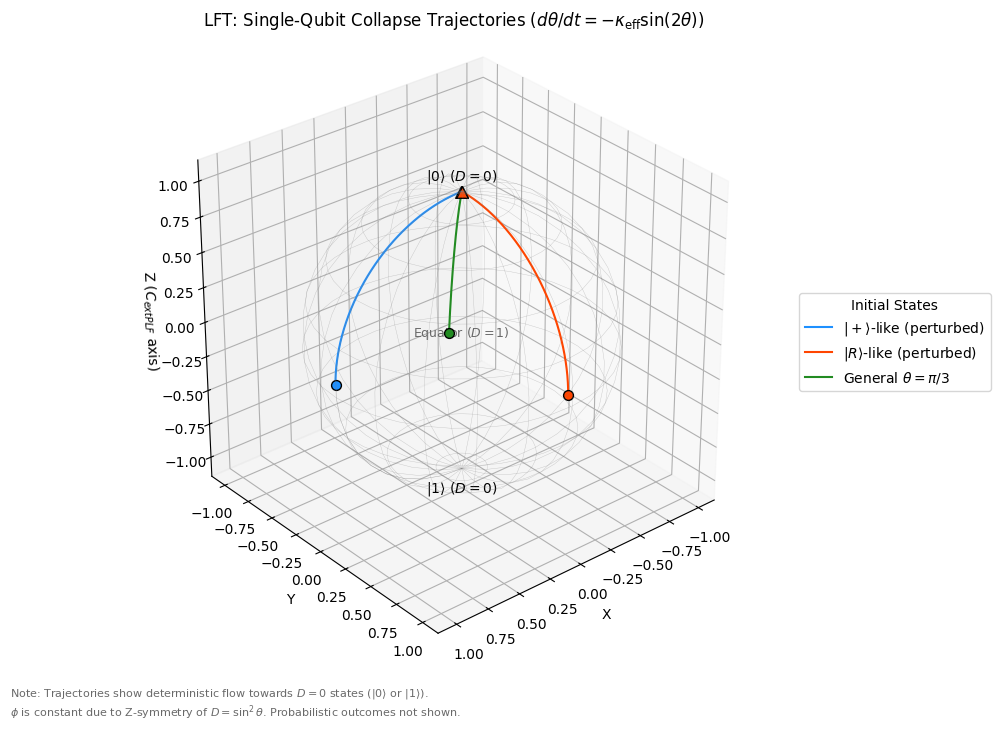

PNG written to working directory → lft_single_qubit_trajectories_revised.png

--- Caption for Single Qubit Trajectories Plot (Fig. 2 in simulation sequence) ---

Simulated trajectories of single-qubit states collapsing on the Bloch sphere under the influence 
of the LFT-derived Logical Force, based on the simplified dynamic model $d\theta/dt = -\kappa_{\mathrm{eff}}\sin(2\theta)$ 
(where $\theta$ is the polar angle and $\kappa_{\mathrm{eff}}$ is an effective rate constant). 
The Preferred Logical Frame ($C_{\text{PLF}}$) is aligned with the Z-axis, defining Logical Strain 
$D(\theta) = \sin^2\theta$. Initial states (marked with 'o') are chosen near the equator ($D \approx 1$, e.g., perturbed $|+\rangle$-like and $|R\rangle$-like states) 
and in the northern hemisphere. All trajectories flow deterministically along lines of constant azimuth $\phi$ 
towards the poles ($|0\rangle$ or $|1\rangle$, where $D=0$), which act as stable attractors (final states marked with '$\triangle$'). 
This 

In [ ]:
# ---------------- Single-Qubit Collapse Trajectories (LFT Toy Model - Revised) ----------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D      # noqa: F401 (3-D needed)

# ----- 1. LFT Model Parameters & Assumptions ------------------------------------
# kappa_eff: Effective collapse-rate scale for the dynamics dθ/dt = -kappa_eff sin(2θ).
# This kappa_eff absorbs the true LFT κ and any mobility/friction factors.
kappa_eff = 1.0  # Adjust for speed of collapse in simulation
dt        = 0.01       # Time step for Euler integration
t_end     = 5.0        # Total integration time (adjust as needed)
epsilon_perturb = 0.01 # Small perturbation to move equatorial states off instability

# LFT Assumption for Single Qubit Strain in Z-aligned C_PLF: D = sin²(θ)
# Resulting Logical Force in θ-direction leads to: dθ/dt = -κ_eff sin(2θ)
# Azimuthal angle φ is constant (dφ/dt = 0) due to Z-symmetry of D.

# ----- 2. ODE Integrator & Trajectory Calculation -------------------------------
def collapse_trajectory(theta0, phi0, kappa, dt, t_end):
    theta, phi = theta0, phi0
    frames = []
    for t_current in np.arange(0, t_end, dt):
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        frames.append((x, y, z))

        # Euler step for theta
        d_theta = -kappa * np.sin(2 * theta) * dt
        theta += d_theta

        # Clip theta to stay on the sphere [0, pi]
        theta = np.clip(theta, 0.0, np.pi)

        # Stop if very close to a pole to avoid excessive points
        if theta < 1e-3 or theta > np.pi - 1e-3:
            # Add final point at the pole
            x_final = np.sin(theta) * np.cos(phi)
            y_final = np.sin(theta) * np.sin(phi)
            z_final = np.cos(theta)
            frames.append((x_final, y_final, z_final))
            break

    return np.array(frames)

# Initial states:
# For equatorial states, perturb slightly to show collapse direction.
initials = [
    (np.pi/2 - epsilon_perturb, 0.0,        r'$|+\rangle$-like (perturbed)'), # Start slightly in Northern H.
    (np.pi/2 - epsilon_perturb, np.pi/2,    r'$|R\rangle$-like (perturbed)'), # |R⟩ = |Y⁺⟩
    (np.pi/3,                   np.pi/4,    r'General $\theta=\pi/3$')
]
trajectories = [collapse_trajectory(th, ph, kappa_eff, dt, t_end) for th, ph, _ in initials]

# ----- 3. Plotting on a Bloch-sphere Wireframe ----------------------------------
fig = plt.figure(figsize=(9, 8)) # Slightly wider for text
ax  = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1]) # Equal axes

# Wireframe sphere (context)
u_surf, v_surf = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x_sphere = np.cos(u_surf) * np.sin(v_surf)
y_sphere = np.sin(u_surf) * np.sin(v_surf)
z_sphere = np.cos(v_surf)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,
                  color='gray', linewidth=0.3, alpha=0.4, rstride=2, cstride=2)

# Plot each trajectory
plot_colors = ['dodgerblue','orangered','forestgreen'] # Using specific color names
for i, traj in enumerate(trajectories):
    label = initials[i][2]
    color = plot_colors[i]
    ax.plot(traj[:,0], traj[:,1], traj[:,2], color=color, lw=1.5, label=label)
    # Start point
    ax.scatter(traj[0,0], traj[0,1], traj[0,2], color=color, s=50, marker='o', ec='black', zorder=5)
    # End point (if trajectory has more than one point)
    if len(traj) > 1:
        ax.scatter(traj[-1,0], traj[-1,1], traj[-1,2], color=color, s=70, marker='^', ec='black', zorder=5)

# Labels, Title, and Viewpoint
ax.set_title(r'LFT: Single-Qubit Collapse Trajectories ($d\theta/dt = -\kappa_{\mathrm{eff}}\sin(2\theta)$)', fontsize=12)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z ($C_{\text{PLF}}$ axis)") # Emphasize Z is the PLF axis

# Annotate poles
ax.text(0, 0, 1.1, "$|0\\rangle$ ($D=0$)", color='black', ha='center', va='center', fontsize=10)
ax.text(0, 0, -1.15, "$|1\\rangle$ ($D=0$)", color='black', ha='center', va='center', fontsize=10)
ax.text(0, 0, 0, "Equator ($D=1$)", color='dimgray', ha='center', va='center', fontsize=9, zorder=0)


ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Initial States")
ax.view_init(elev=30, azim=50) # Adjusted view

fig.text(0.02, 0.02,
         r"Note: Trajectories show deterministic flow towards $D=0$ states ($|0\rangle$ or $|1\rangle$)." +
         "\n" +
         r"$\phi$ is constant due to Z-symmetry of $D=\sin^2\theta$. Probabilistic outcomes not shown.",
         ha='left', va='bottom', fontsize=8, color='dimgray')

# ----- 4. Save and Display ------------------------------------------------------
plt.savefig('lft_single_qubit_trajectories_revised.png', dpi=300, bbox_inches='tight')
plt.show()

print('PNG written to working directory → lft_single_qubit_trajectories_revised.png')


# ----- Caption for LaTeX Document (as text) -----------------------------
caption_script2_text = r"""
Simulated trajectories of single-qubit states collapsing on the Bloch sphere under the influence
of the LFT-derived Logical Force, based on the simplified dynamic model $d\theta/dt = -\kappa_{\mathrm{eff}}\sin(2\theta)$
(where $\theta$ is the polar angle and $\kappa_{\mathrm{eff}}$ is an effective rate constant).
The Preferred Logical Frame ($C_{\text{PLF}}$) is aligned with the Z-axis, defining Logical Strain
$D(\theta) = \sin^2\theta$. Initial states (marked with 'o') are chosen near the equator ($D \approx 1$, e.g., perturbed $|+\rangle$-like and $|R\rangle$-like states)
and in the northern hemisphere. All trajectories flow deterministically along lines of constant azimuth $\phi$
towards the poles ($|0\rangle$ or $|1\rangle$, where $D=0$), which act as stable attractors (final states marked with '$\triangle$').
This plot illustrates the LFT mechanism of strain minimization driving state evolution but does not depict
the probabilistic aspect of outcome selection (governed by the LFT-Modified Born Rule) for an initial
state exactly on the unstable equatorial separatrix.
"""

print("\n--- Caption for Single Qubit Trajectories Plot (Fig. 2 in simulation sequence) ---")
print(caption_script2_text)

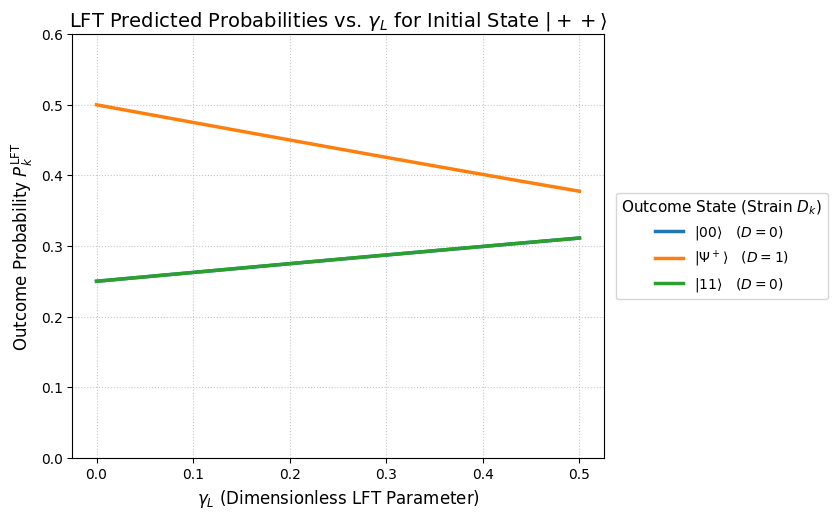

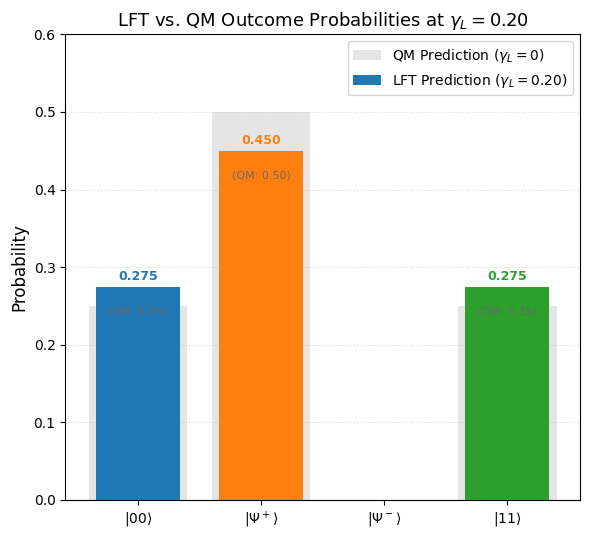

PNG files saved: lft_probs_vs_gamma_final_v2.png, lft_hist_gamma_final_v2.png

--- Caption for Line Plot (Suggest label: fig:lft_probs_vs_gamma in LaTeX) ---

Figure \ref{fig:lft_probs_vs_gamma}: Predicted LFT outcome probabilities $P_k^{\mathrm{LFT}}$ as a function of the 
LFT parameter $\gamma_L$. The initial state is $|\Psi_{\mathrm{initial}}\rangle = |++\rangle$, 
measured in the orthonormal basis $M' = \{|M'_1\rangle=|00\rangle, |M'_2\rangle=|\Psi^+\rangle, |M'_3\rangle=|\Psi^-\rangle, |M'_4\rangle=|11\rangle\}$.
The Logical Strain $D_k$ for each outcome state $|M'_k\rangle$ (evaluated in $C_{\text{PLF}}$) is indicated in the legend.
Note that $P(|\Psi^-\rangle)=0$ for this specific initial state and basis choice due to $|\langle \Psi^-|++\rangle|^2 = 0$. As $\gamma_L$ increases, 
the probability of the $D=1$ outcome ($|\Psi^+\rangle$) is suppressed, while the 
probabilities of $D=0$ outcomes ($|00\rangle, |11\rangle$) are correspondingly enhanced due to re-normalization.


--- Ca

In [ ]:
# ---------------- Revised Two-Qubit LFT Probability Visualization (v6 - Legend Title Fix) ----------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For potential 3D axes if other plots were added, not strictly needed here

# ----- 1. LFT Experimental Model Settings ------------------------------------
gamma_L_vals = np.linspace(0.0, 0.5, 51)
D_outcomes = np.array([0.0, 1.0, 1.0, 0.0])
labels_outcomes_with_D_legend = [
    r'$|00\rangle \quad (D=0)$',
    r'$|\Psi^+\rangle \quad (D=1)$',
    r'$|\Psi^-\rangle \quad (D=1)$',
    r'$|11\rangle \quad (D=0)$'
]
labels_outcomes_simple_ticks = [r'$|00\rangle$', r'$|\Psi^+\rangle$', r'$|\Psi^-\rangle$', r'$|11\rangle$']
P_qm_initial = np.array([0.25, 0.50, 0.0, 0.25])
plot_colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green']

# ----- 2. LFT-Modified Born Rule Calculation --------------------------------
P_LFT_results = np.zeros((len(gamma_L_vals), 4))
for k_gamma, gamma_L_current in enumerate(gamma_L_vals):
    unnormalized_lft_terms = P_qm_initial * np.exp(-gamma_L_current * D_outcomes)
    sum_unnormalized = unnormalized_lft_terms.sum()
    if sum_unnormalized < 1e-9:
        P_LFT_results[k_gamma, :] = unnormalized_lft_terms
    else:
        P_LFT_results[k_gamma, :] = unnormalized_lft_terms / sum_unnormalized

# ----- 3A. Line Plot: Outcome Probabilities vs. γ_L ------------------------
fig1, ax1 = plt.subplots(figsize=(8.5, 5.5))
for idx, label_d_legend in enumerate(labels_outcomes_with_D_legend):
    if P_qm_initial[idx] > 1e-9:
        ax1.plot(gamma_L_vals, P_LFT_results[:, idx], label=label_d_legend, color=plot_colors[idx], linewidth=2.5)

ax1.set_xlabel(r'$\gamma_L$ (Dimensionless LFT Parameter)', fontsize=12)
ax1.set_ylabel('Outcome Probability $P_k^{\mathrm{LFT}}$', fontsize=12)
ax1.set_title(r'LFT Predicted Probabilities vs. $\gamma_L$ for Initial State $|++\rangle$', fontsize=14)
# CORRECTED LEGEND TITLE
ax1.legend(title=r'Outcome State (Strain $D_k$)', loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10, title_fontsize=11)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.set_ylim(0, 0.6)
ax1.tick_params(axis='both', which='major', labelsize=10)
fig1.subplots_adjust(right=0.75)
fig1.savefig('lft_probs_vs_gamma_final_v2.png', dpi=300, bbox_inches='tight')


# ----- 3B. Bar Chart: Probabilities at a specific γ_L ----------------------
gamma_L_benchmark = 0.2
benchmark_idx = np.argmin(np.abs(gamma_L_vals - gamma_L_benchmark))
P_LFT_at_benchmark = P_LFT_results[benchmark_idx, :]
actual_gamma_L_benchmark = gamma_L_vals[benchmark_idx]

fig2, ax2 = plt.subplots(figsize=(6, 5.5))
bar_width = 0.8
bar_positions = np.arange(len(labels_outcomes_simple_ticks))
ax2.bar(bar_positions, P_qm_initial, width=bar_width, color='silver', alpha=0.4, label=r'QM Prediction ($\gamma_L=0$)', zorder=2)
relevant_indices = [i for i, p in enumerate(P_qm_initial) if p > 1e-9]
relevant_labels = [labels_outcomes_simple_ticks[i] for i in relevant_indices]
relevant_p_lft = [P_LFT_at_benchmark[i] for i in relevant_indices]
relevant_bar_pos = [bar_positions[i] for i in relevant_indices]
relevant_colors = [plot_colors[i] for i in relevant_indices]
bars_lft = ax2.bar(relevant_bar_pos, relevant_p_lft, width=bar_width*0.85, color=relevant_colors, zorder=3, label=f'LFT Prediction ($\\gamma_L={actual_gamma_L_benchmark:.2f}$)') # Added $ around gamma_L in label

ax2.set_xticks(bar_positions)
ax2.set_xticklabels(labels_outcomes_simple_ticks, fontsize=10)
ax2.set_ylim(0, 0.6)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title(fr'LFT vs. QM Outcome Probabilities at $\gamma_L = {actual_gamma_L_benchmark:.2f}$', fontsize=13)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, linestyle=':', alpha=0.5, axis='y', zorder=1)
ax2.tick_params(axis='both', which='major', labelsize=10)

for i, bar_idx in enumerate(relevant_indices):
    p_lft_val = P_LFT_at_benchmark[bar_idx]
    p_qm_val = P_qm_initial[bar_idx]
    ax2.text(bars_lft[i].get_x() + bars_lft[i].get_width()/2., p_lft_val + 0.005, f'{p_lft_val:.3f}',
             ha='center', va='bottom', color=plot_colors[bar_idx], fontweight='bold', fontsize=9)
    ax2.text(bars_lft[i].get_x() + bars_lft[i].get_width()/2., p_lft_val - 0.025, f'(QM: {p_qm_val:.2f})',
             ha='center', va='top', color='dimgray', fontsize=8)

fig2.tight_layout()
fig2.savefig('lft_hist_gamma_final_v2.png', dpi=300, bbox_inches='tight')
plt.show()

print('PNG files saved: lft_probs_vs_gamma_final_v2.png, lft_hist_gamma_final_v2.png')

# ----- Captions for LaTeX Document (as text) -----------------------------
caption_fig1_text = r"""
Figure \ref{fig:lft_probs_vs_gamma}: Predicted LFT outcome probabilities $P_k^{\mathrm{LFT}}$ as a function of the
LFT parameter $\gamma_L$. The initial state is $|\Psi_{\mathrm{initial}}\rangle = |++\rangle$,
measured in the orthonormal basis $M' = \{|M'_1\rangle=|00\rangle, |M'_2\rangle=|\Psi^+\rangle, |M'_3\rangle=|\Psi^-\rangle, |M'_4\rangle=|11\rangle\}$.
The Logical Strain $D_k$ for each outcome state $|M'_k\rangle$ (evaluated in $C_{\text{PLF}}$) is indicated in the legend.
Note that $P(|\Psi^-\rangle)=0$ for this specific initial state and basis choice due to $|\langle \Psi^-|++\rangle|^2 = 0$. As $\gamma_L$ increases,
the probability of the $D=1$ outcome ($|\Psi^+\rangle$) is suppressed, while the
probabilities of $D=0$ outcomes ($|00\rangle, |11\rangle$) are correspondingly enhanced due to re-normalization.
"""
ref_string_for_caption = r"Figure~\ref{fig:lft_probs_vs_gamma}"
caption_fig2_text = """
Figure \\ref{{fig:lft_hist_gamma}}: Comparison of LFT predicted outcome probabilities (solid colored bars) with
standard Quantum Mechanical probabilities (faint gray bars, corresponding to $\\gamma_L=0$)
for a benchmark value of $\\gamma_L = {gamma_val:.2f}$. The initial state and measurement basis are the same as in {ref_str}.
The LFT probabilities (numerical values above bars) show suppression of the $D=1$ outcome ($|\\Psi^+\\rangle$) and enhancement
of $D=0$ outcomes ($|00\\rangle, |11\\rangle$) relative to QM predictions (numerical values in parentheses). The outcome $|\\Psi^-\\rangle$ has zero probability for this setup and is therefore not shown with a colored bar.
""".format(gamma_val=actual_gamma_L_benchmark, ref_str=ref_string_for_caption)

print("\n--- Caption for Line Plot (Suggest label: fig:lft_probs_vs_gamma in LaTeX) ---")
print(caption_fig1_text)
print("\n--- Caption for Bar Chart (Suggest label: fig:lft_hist_gamma in LaTeX) ---")
print(caption_fig2_text)

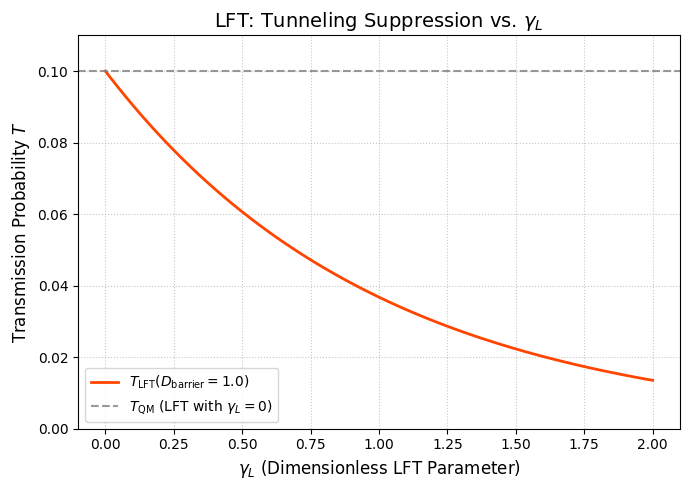

PNG file saved: lft_tunneling_suppression_revised.png

--- Caption for Tunneling Suppression Plot ---

Figure \ref{fig:lft_tunneling_suppression}: Predicted LFT modification to quantum tunneling probability 
as a function of the LFT parameter $\gamma_L$. The plot assumes a baseline quantum mechanical 
transmission probability $T_{\mathrm{QM}}$ (gray dashed line, corresponding to $\gamma_L=0$). 
LFT predicts a suppression factor $\exp[-\gamma_L D_{\mathrm{barrier}}]$, where $D_{\mathrm{barrier}}$ 
is the effective Logical Strain associated with the particle traversing or existing within the barrier region. 
For this illustration, $D_{\mathrm{barrier}} = 1.0$ is assumed. As $\gamma_L$ increases, 
the LFT transmission probability $T_{\mathrm{LFT}}$ (solid red line) is exponentially suppressed 
relative to $T_{\mathrm{QM}}$. This provides another potential avenue for experimentally constraining $\gamma_L$.



In [ ]:
# ---------------- LFT Tunneling Suppression vs. γ_L (Revised) ----------------
import numpy as np
import matplotlib.pyplot as plt

# ----- 1. Physical & LFT Model Parameters -------------------------------------
# --- Quantum Mechanical (QM) Baseline for a Square Barrier ---
# Using natural units where ħ = 1, 2m = 1 for simplicity in WKB formula.
# These specific QM values only serve to set a T_QM baseline.
V0 = 10.0  # Barrier height
a  = 1.0   # Barrier width
E  = 5.0   # Particle energy (E < V0 for tunneling)

if E >= V0:
    print("Warning: Particle energy E is not less than barrier height V0. Not a tunneling scenario.")
    T_QM_baseline = 1.0 # Or handle as error
else:
    kappa_qm = np.sqrt(V0 - E) # Attenuation constant inside barrier (for 2m=1, ħ=1)
    # Standard WKB approximation for transmission probability (for thick barriers)
    # More general formula can be complex, exp(-2*kappa*a) is a common approximation for T << 1
    # For simplicity, let's use a typical suppression form, but T_QM could be calculated more accurately.
    # Let's assume a T_QM directly for illustration rather than relying on a specific V0, E, a.
    # T_QM_baseline = np.exp(-2 * kappa_qm * a)
    T_QM_baseline = 0.1 # Assume QM predicts 10% transmission for this hypothetical barrier

# --- LFT Parameters ---
gamma_L_vals = np.linspace(0.0, 2.0, 101)  # Sweep γ_L over a larger range to see more suppression

# D_barrier: Effective average Logical Strain attributed to the barrier region.
# LFT posits that traversing a region that enforces or corresponds to a high D
# configuration for the particle is suppressed.
# For this toy model, we assume a constant, effective D for the barrier.
D_barrier_effective = 1.0  # Assume the barrier region imposes an effective D=1 logical strain cost.
                         # In a full LFT model, D(x) would be a function of position within the barrier.

# ----- 2. LFT-Modified Tunneling Probability Calculation -----------------------
# LFT Prediction: T_LFT = T_QM * exp(-γ_L * D_barrier_effective)
# This D_barrier_effective can be thought of as an integrated strain cost: ∫ D(x)dx / width,
# or simply the D value of the strained state the particle must adopt inside the barrier.
T_LFT_results = T_QM_baseline * np.exp(-gamma_L_vals * D_barrier_effective)

# ----- 3. Plotting -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 5))

# Plot LFT tunneling probability
ax.plot(gamma_L_vals, T_LFT_results, label=r'$T_{\mathrm{LFT}}(D_{\mathrm{barrier}}=' + f'{D_barrier_effective:.1f})$', color='orangered', linewidth=2)

# Plot QM baseline
ax.axhline(T_QM_baseline, linestyle='--', color='gray', alpha=0.8,
            label=r'$T_{\mathrm{QM}} \mathrm{\ (LFT\ with\ } \gamma_L=0)$')

# Plot enhancements
ax.set_xlabel(r'$\gamma_L$ (Dimensionless LFT Parameter)', fontsize=12)
ax.set_ylabel('Transmission Probability $T$', fontsize=12)
ax.set_title(r'LFT: Tunneling Suppression vs. $\gamma_L$', fontsize=14)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize=10)
ax.set_ylim(0, T_QM_baseline * 1.1) # Adjust y-limit
ax.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
fig.savefig('lft_tunneling_suppression_revised.png', dpi=300)
plt.show()

print('PNG file saved: lft_tunneling_suppression_revised.png')

# ----- Caption for LaTeX Document (as text) -----------------------------
caption_script3_text = fr"""
Figure \ref{{fig:lft_tunneling_suppression}}: Predicted LFT modification to quantum tunneling probability
as a function of the LFT parameter $\gamma_L$. The plot assumes a baseline quantum mechanical
transmission probability $T_{{\mathrm{{QM}}}}$ (gray dashed line, corresponding to $\gamma_L=0$).
LFT predicts a suppression factor $\exp[-\gamma_L D_{{\mathrm{{barrier}}}}]$, where $D_{{\mathrm{{barrier}}}}$
is the effective Logical Strain associated with the particle traversing or existing within the barrier region.
For this illustration, $D_{{\mathrm{{barrier}}}} = {D_barrier_effective:.1f}$ is assumed. As $\gamma_L$ increases,
the LFT transmission probability $T_{{\mathrm{{LFT}}}}$ (solid red line) is exponentially suppressed
relative to $T_{{\mathrm{{QM}}}}$. This provides another potential avenue for experimentally constraining $\gamma_L$.
"""
# NOTE FOR AUTHOR (JDL): You'll need to add \label{fig:lft_tunneling_suppression} to your figure environment in LaTeX.

print("\n--- Caption for Tunneling Suppression Plot ---")
print(caption_script3_text)

In [ ]:
# ───────────────── Simulation #5: Shot–budget table + LaTeX caption ─────────────────
import numpy as np, pandas as pd, math, os

# 1.  Parameter sweep for γ_L
gamma_vals = np.array([0.005, 0.01, 0.02, 0.03, 0.05])
Z_sigma = 5            # 5 σ one–sample test
p_qm    = 0.5          # P_QM(|Ψ⁺⟩)

rows = []
for γ in gamma_vals:
    p_lft   = np.exp(-γ) / (1 + np.exp(-γ))            # P_LFT(|Ψ⁺⟩)
    delta_p = p_lft - p_qm
    N_req   = math.ceil((Z_sigma**2) * p_qm * (1 - p_qm) / (delta_p**2))
    eps_max = abs(delta_p) / 2                         # ε_SPAM < |ΔP|/2
    rows.append({
        "gamma_L": γ,
        "P_LFT(|Ψ⁺⟩)": p_lft,
        "Delta_P": delta_p,
        "Shots_for_5σ": N_req,
        "Max_SPAM_error": eps_max
    })

df = pd.DataFrame(rows)
display(df)   # inline table

# 2.  Save CSV to runtime
csv_path = "LFT_shot_budget_v2.csv"
df.to_csv(csv_path, index=False)
print(f"\nCSV saved → {csv_path}")

# 3.  Emit LaTeX caption
caption = r"""
\caption[Shot-count for Bell-basis LFT test]{
\textbf{Required statistics and SPAM tolerance for the flagship
two-qubit LFT experiment.}
Initial state $|\Psi_{\text{init}}\rangle = |++\rangle$ is measured in the
Bell–computational basis
$M'=\{|00\rangle,|\Psi^{+}\rangle,|\Psi^{-}\rangle,|11\rangle\}$,
with logical-strain values $D=\{0,1,1,0\}$.
The test statistic is
$R = P(|\Psi^{+}\rangle)/[P(|00\rangle)+P(|11\rangle)]$,
for which LFT predicts $R_{\text{LFT}} = e^{-\gamma_L}$ while quantum
mechanics gives $R_{\text{QM}} = 1$.
For each representative coupling $\gamma_L$ we list
(i) the single-channel deviation
$\Delta P = P_{\text{LFT}}(|\Psi^{+}\rangle) - 0.5$,
(ii) the number of shots $N$ needed to resolve that deviation at
$5\sigma$ significance (one-sample binomial test), and
(iii) the maximum allowable combined state-preparation-and-measurement
error $\epsilon_{\text{SPAM}} < |\Delta P|/2$, i.e.\ systematic bias no
more than \emph{half} the size of the signal.
Detecting $\gamma_L = 0.01$ therefore calls for $\sim10^{6}$ shots and
sub-0.2\,\% SPAM—challenging yet within reach of today’s
best superconducting-qubit platforms.}
\label{tab:lft_shot_budget}
"""
print("\nLaTeX caption:\n", caption)


,gamma_L,P_LFT(|Ψ⁺⟩),Delta_P,Shots_for_5σ,Max_SPAM_error
0,0.005,0.498750,-0.001250,4000017,0.000625
1,0.010,0.497500,-0.002500,1000017,0.001250
2,0.020,0.495000,-0.005000,250017,0.002500
3,0.030,0.492501,-0.007499,111128,0.003750
4,0.050,0.487503,-0.012497,40017,0.006249



CSV saved → LFT_shot_budget_v2.csv

LaTeX caption:
 
\caption[Shot-count for Bell-basis LFT test]{
\textbf{Required statistics and SPAM tolerance for the flagship
two-qubit LFT experiment.}
Initial state $|\Psi_{\text{init}}\rangle = |++\rangle$ is measured in the
Bell–computational basis
$M'=\{|00\rangle,|\Psi^{+}\rangle,|\Psi^{-}\rangle,|11\rangle\}$,
with logical-strain values $D=\{0,1,1,0\}$.
The test statistic is
$R = P(|\Psi^{+}\rangle)/[P(|00\rangle)+P(|11\rangle)]$,
for which LFT predicts $R_{\text{LFT}} = e^{-\gamma_L}$ while quantum
mechanics gives $R_{\text{QM}} = 1$.
For each representative coupling $\gamma_L$ we list
(i) the single-channel deviation
$\Delta P = P_{\text{LFT}}(|\Psi^{+}\rangle) - 0.5$,
(ii) the number of shots $N$ needed to resolve that deviation at
$5\sigma$ significance (one-sample binomial test), and
(iii) the maximum allowable combined state-preparation-and-measurement
error $\epsilon_{\text{SPAM}} < |\Delta P|/2$, i.e.\ systematic bias no
more than \e

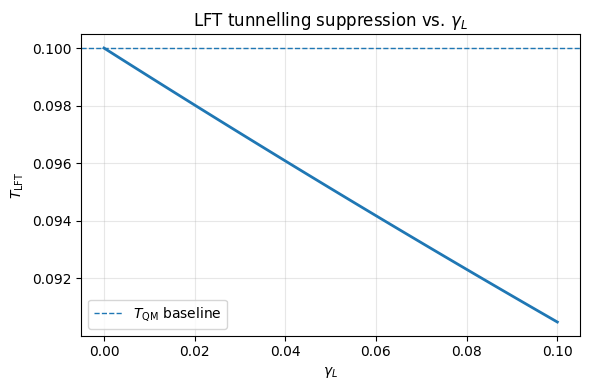

PNG saved → tunneling_suppression_vs_gamma.png


In [ ]:
# ---------------- LFT tunnelling suppression vs. gamma_L ---------------
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma_vals = np.linspace(0.0, 0.10, 101)
T_QM       = 0.10                      # fixed WKB baseline
T_LFT      = T_QM * np.exp(-gamma_vals)  # Eq. (4.3)

# Plot
plt.figure(figsize=(6,4))
plt.plot(gamma_vals, T_LFT, linewidth=2)
plt.axhline(T_QM, linestyle='--', linewidth=1, label=r'$T_{\mathrm{QM}}$ baseline')
plt.xlabel(r'$\gamma_L$')
plt.ylabel(r'$T_{\mathrm{LFT}}$')
plt.title('LFT tunnelling suppression vs. $\gamma_L$')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and show
fname = 'tunneling_suppression_vs_gamma.png'
plt.savefig(fname, dpi=300)
plt.show()
print(f'PNG saved → {fname}')


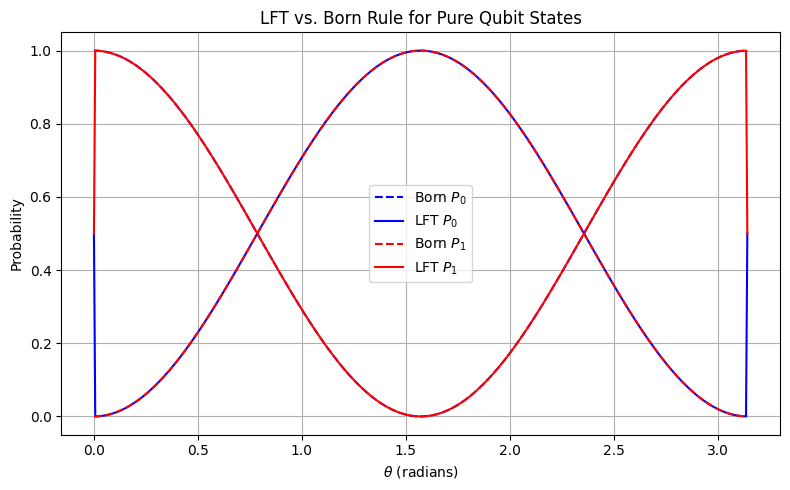

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta range and coupling constant
theta = np.linspace(0, np.pi, 500)
kappa = 1.0  # LFT coupling

# Pure state: |ψ⟩ = cos(θ)|0⟩ + sin(θ)|1⟩
p0 = np.cos(theta)**2
p1 = np.sin(theta)**2

# Logical strain function: D_i = p_i * ln(p_i / (1 - p_i))
def strain(p):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where((p == 0) | (p == 1), 0, p * np.log(p / (1 - p)))

D0 = strain(p0)
D1 = strain(p1)

# Normalize to ΔD_i = D_i - min(D)
minD = np.minimum(D0, D1)
DeltaD0 = D0 - minD
DeltaD1 = D1 - minD

# LFT-weighted probabilities
Z = np.exp(-kappa * DeltaD0) + np.exp(-kappa * DeltaD1)
P0_LFT = np.exp(-kappa * DeltaD0) / Z
P1_LFT = np.exp(-kappa * DeltaD1) / Z

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(theta, p0, '--', label='Born $P_0$', color='blue')
plt.plot(theta, P0_LFT, '-', label='LFT $P_0$', color='blue')
plt.plot(theta, p1, '--', label='Born $P_1$', color='red')
plt.plot(theta, P1_LFT, '-', label='LFT $P_1$', color='red')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel('Probability')
plt.title('LFT vs. Born Rule for Pure Qubit States')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig_born_recovery.png', dpi=300)
plt.show()
